In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)
#pd.pandas.set_option('display.max_rows', None)

In [3]:
# Loading the dataset
dataset = pd.read_csv('Attrition Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

dataset.shape

#print(dataset.head())

(1470, 35)

In [4]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


1) EXPLORATORY DATA ANALYSIS (EDA)

Missing Values

In [9]:
# Finding number of missing values in each column of the dataset

print(dataset.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
# Checking the percentage of missing (nan) values in each feature of the dataset

features_with_nan = [features for features in dataset.columns if dataset[features].isnull().sum()>=1]  # Find out all features with atleast 1 missing values

for feature in features_with_nan:
    print(feature, np.round(dataset[feature].isnull().mean(), 4), ' % missing values')

The dataset doesn't contain any missing values. So, there is no necessity to handle the missing values.

In [13]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [19]:
dataset.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Numerical features in the dataset

In [16]:
num_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print("Number of numerical features: ", len(num_features))

# List all the numerical features from the dataset
dataset[num_features].head()

Number of numerical features:  26


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [28]:
print(dataset['Attrition'].value_counts(normalize=True))

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


237 (16.12%) out of 1470 employees has left the company while others are still employed. The dataset is highly imbalanced!

Finding discrete numerical features in the dataset.

In [36]:
discrete_features = [feature for feature in num_features if len(dataset[feature].unique()) < 15 and feature not in ['EmployeeNumber']]

print(discrete_features)

print('Discrete variables count: {}'.format(len(discrete_features)))

['Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']
Discrete variables count: 13


 Finding the relationship of discrete numeric features with respect to Attrition

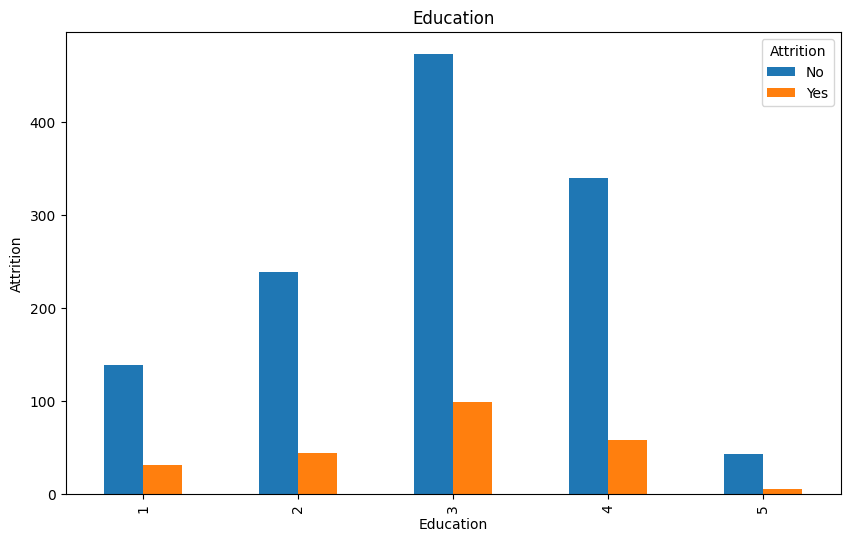

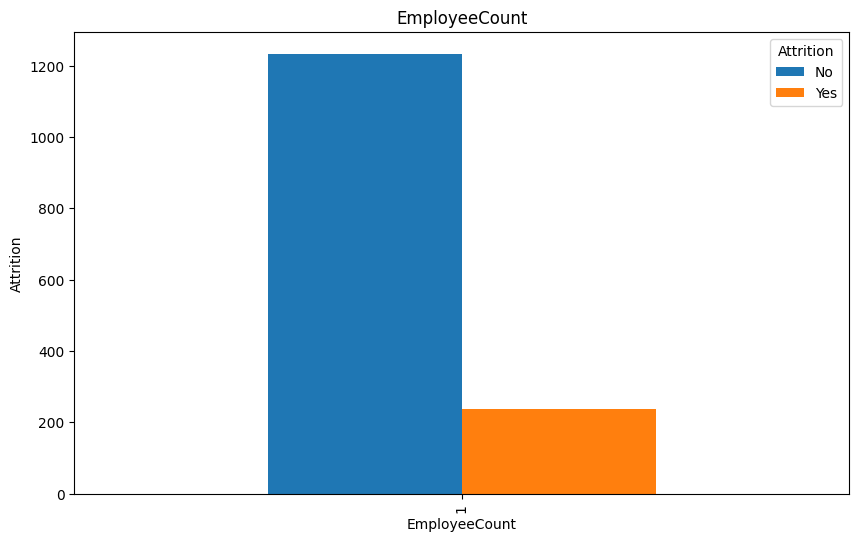

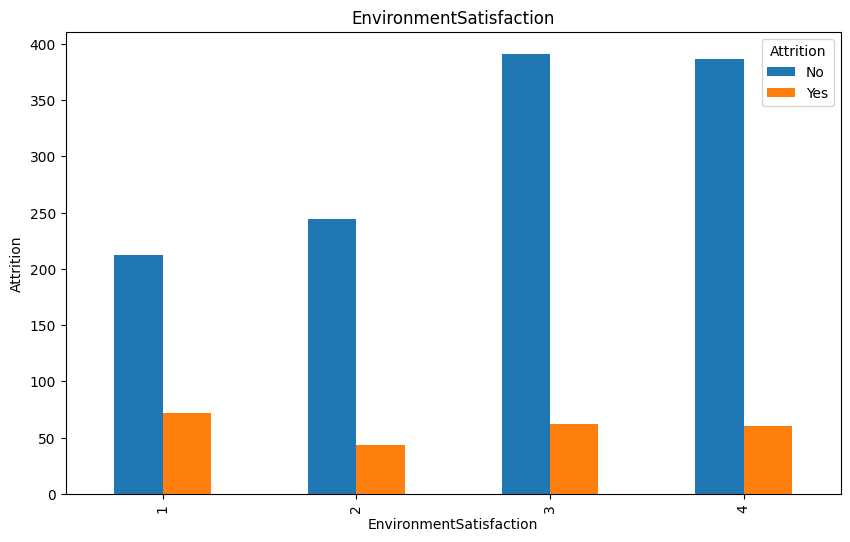

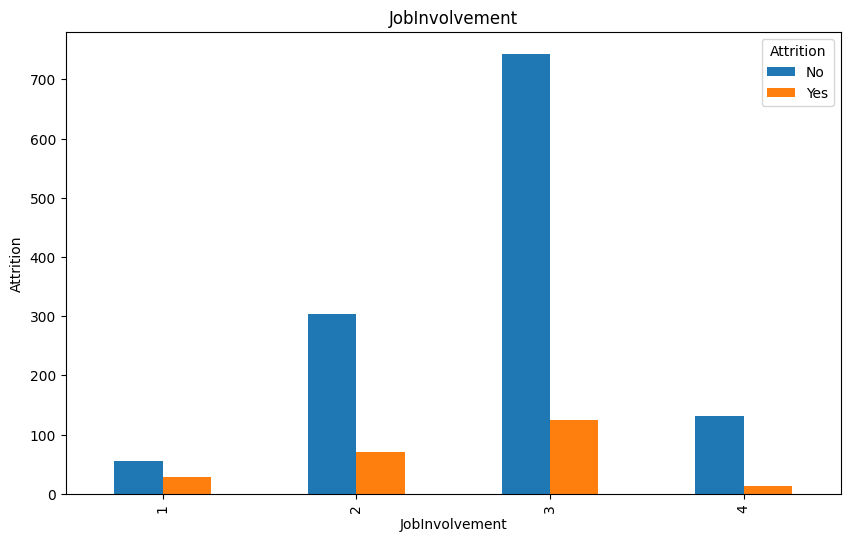

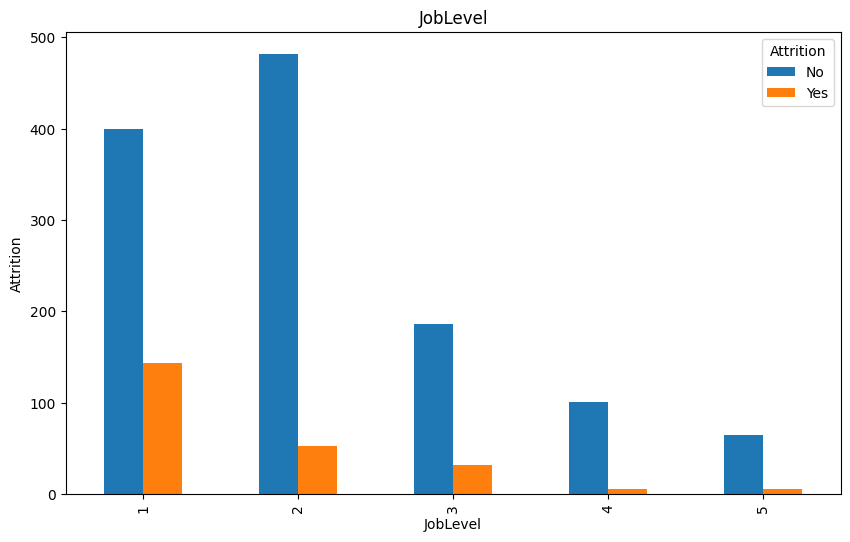

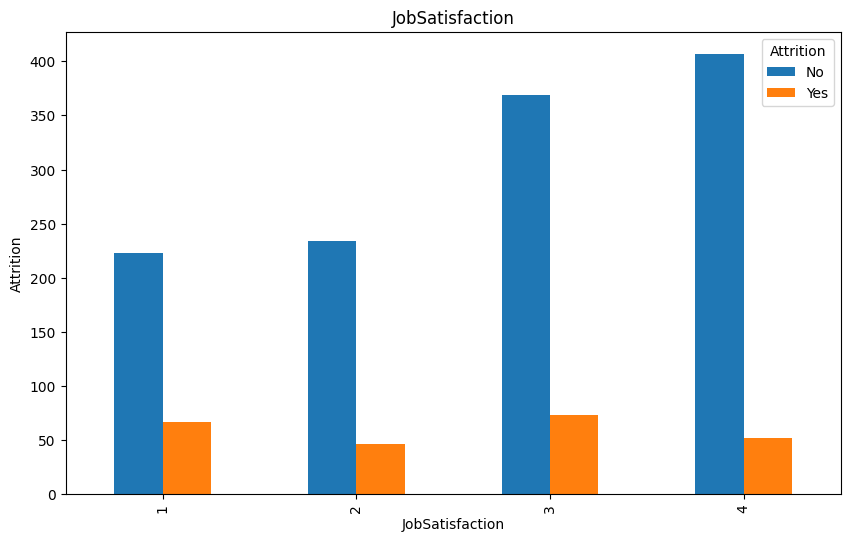

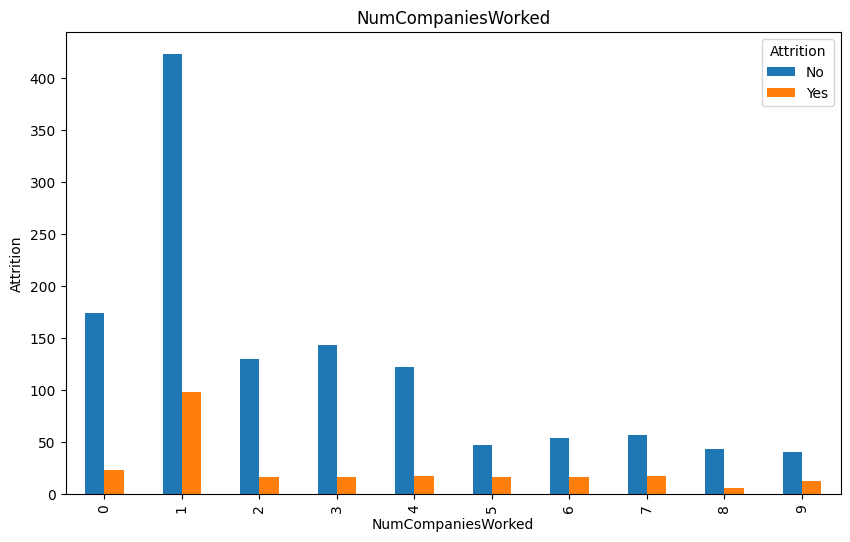

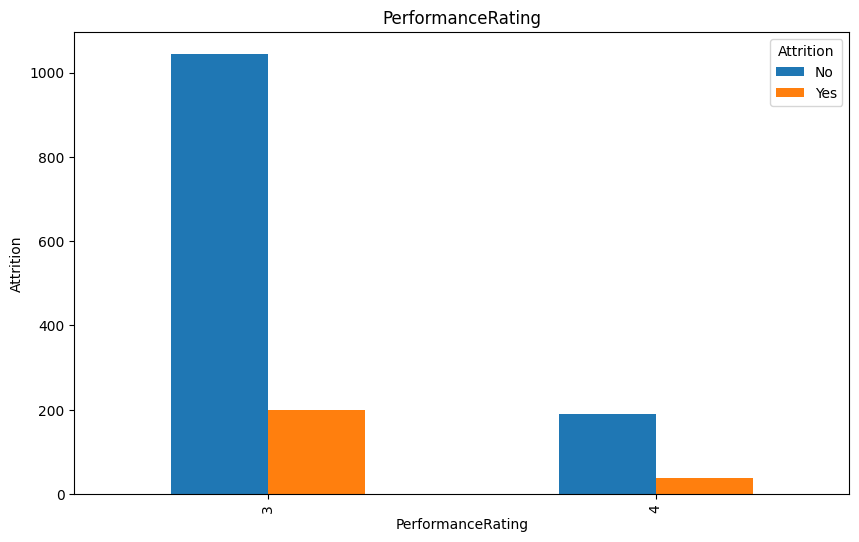

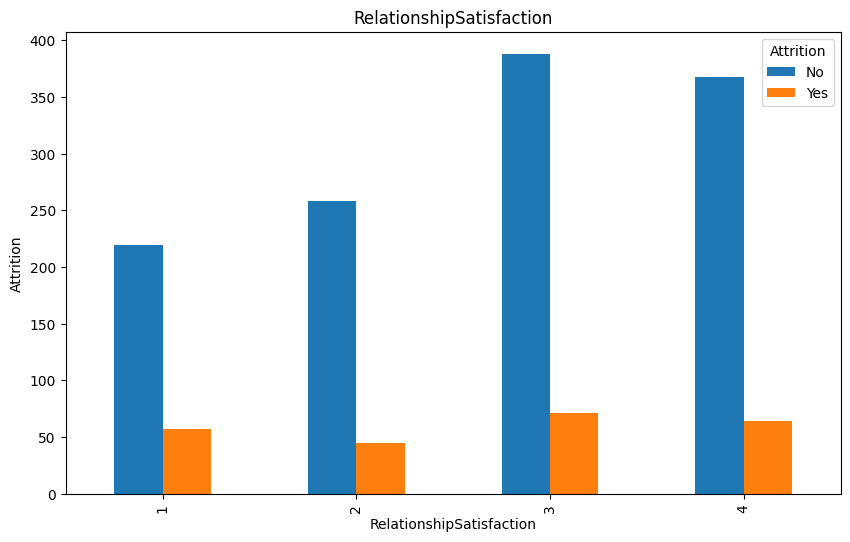

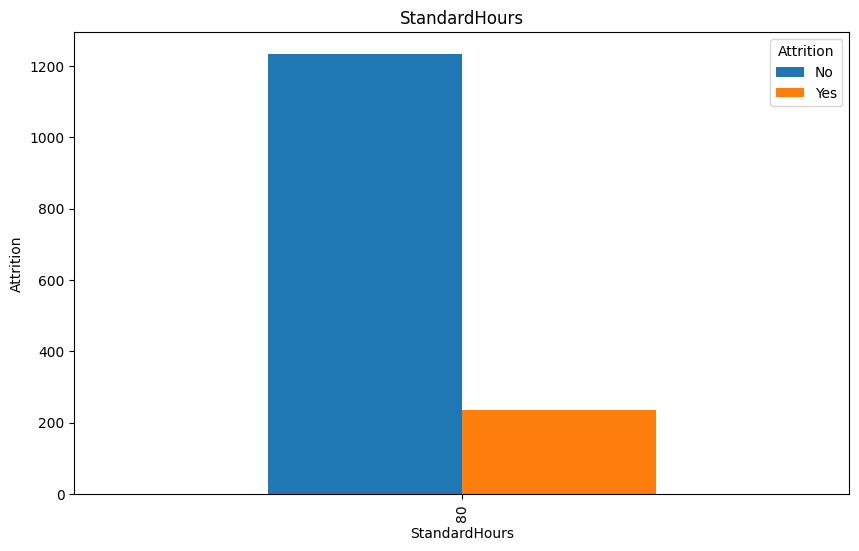

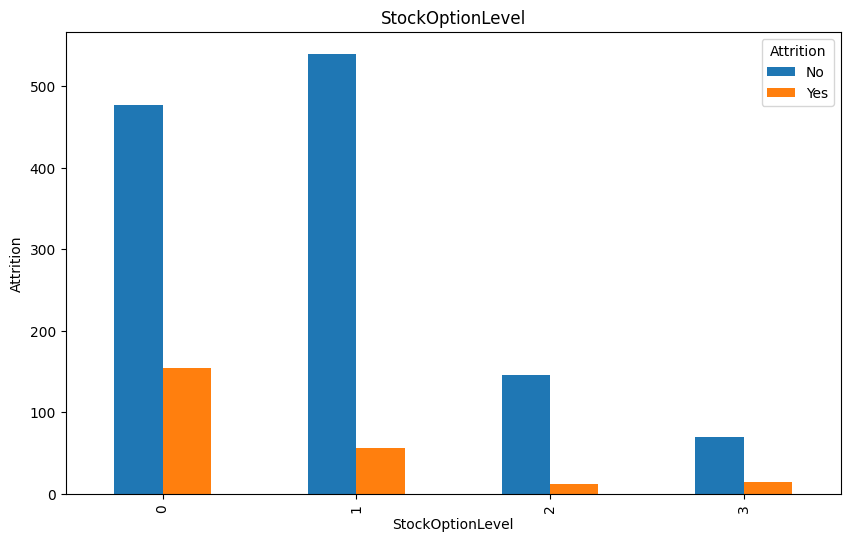

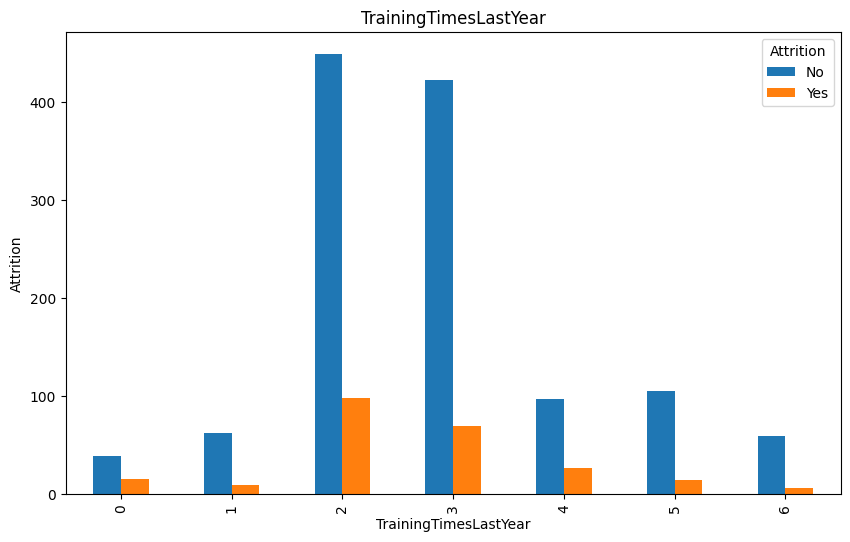

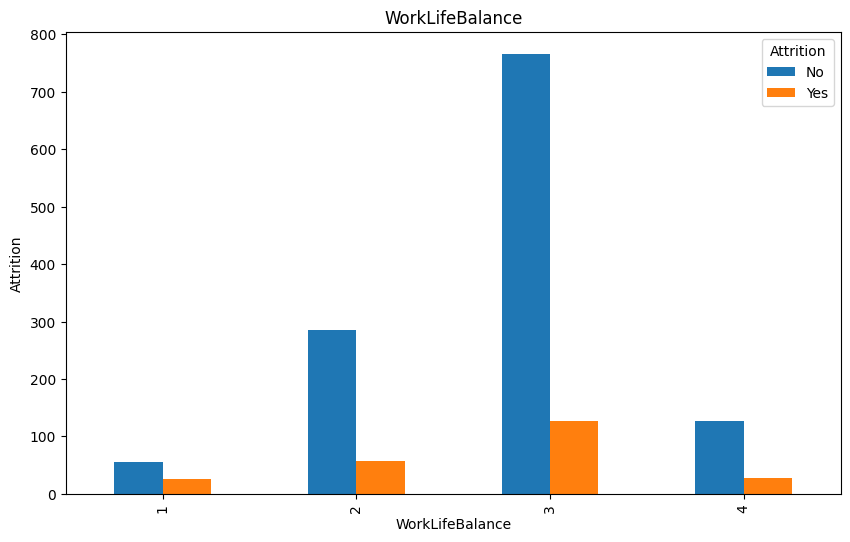

In [52]:
for feature in discrete_features:
    
    data = dataset.copy()

    # Count occurrences of each combination of discrete numerical features and Attrition
    count_data = data.groupby([feature, 'Attrition']).size().reset_index(name='count')

    # Pivot the data so that 'Yes' and 'No' are separate columns
    pivot_data = count_data.pivot(index=feature, columns= 'Attrition', values='count').fillna(0)

    # Plot the grouped bar chart
    pivot_data.plot(kind='bar', stacked=False, figsize=(10, 6))

    plt.xlabel(feature)
    plt.ylabel('Attrition')
    plt.title(feature)
    # plt.xticks(rotation=0)
    # plt.legend(title='Y', loc='upper right')

    plt.show()   

 Finding the distributiom of continuous numeric features

In [56]:
continuous_features = [feature for feature in num_features if feature not in discrete_features+['EmployeeNumber']]

print(continuous_features)

print('Continuous features count: {}'.format(len(continuous_features)))

['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Continuous features count: 12


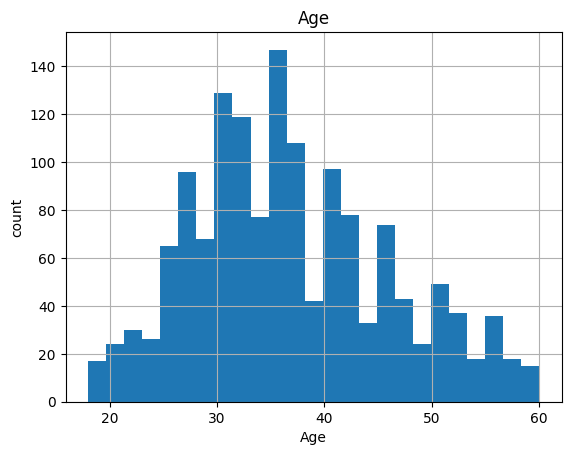

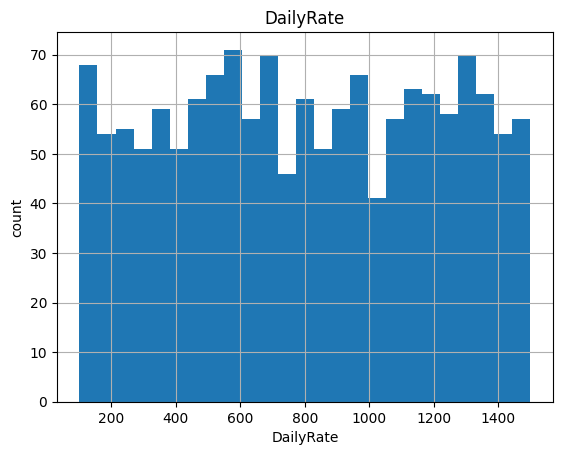

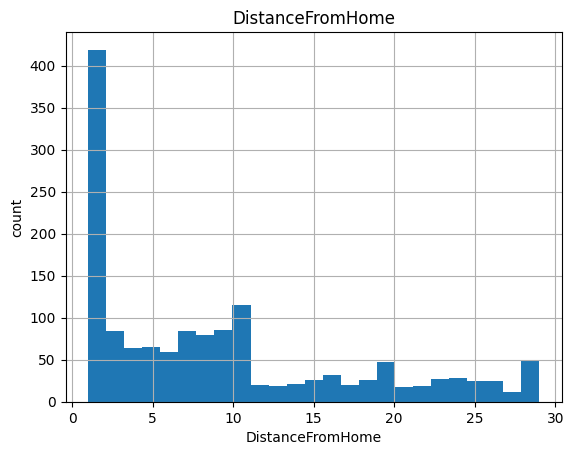

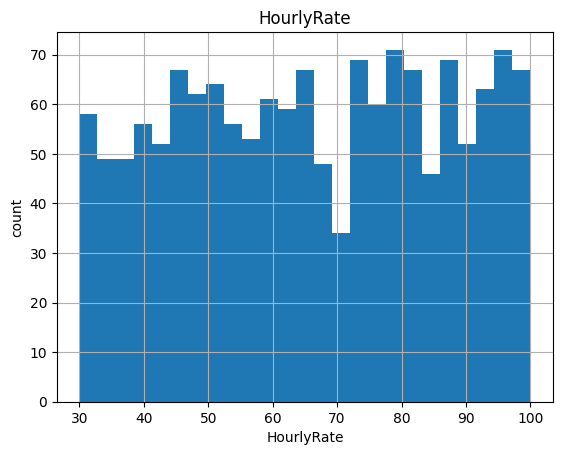

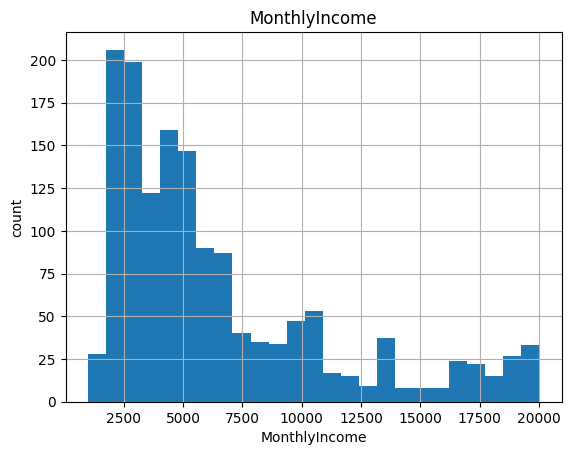

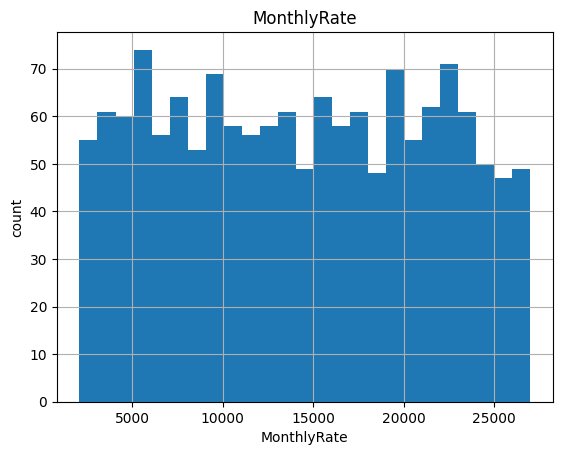

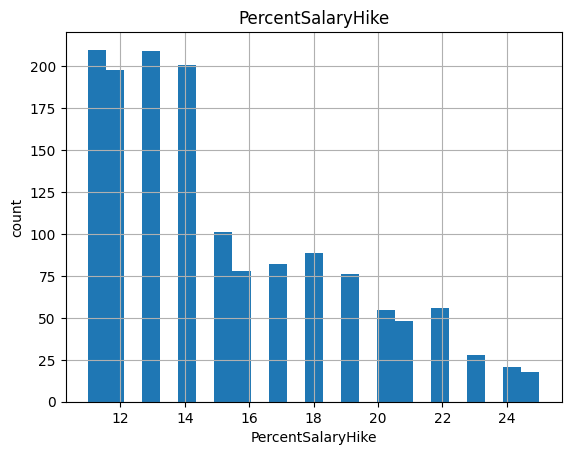

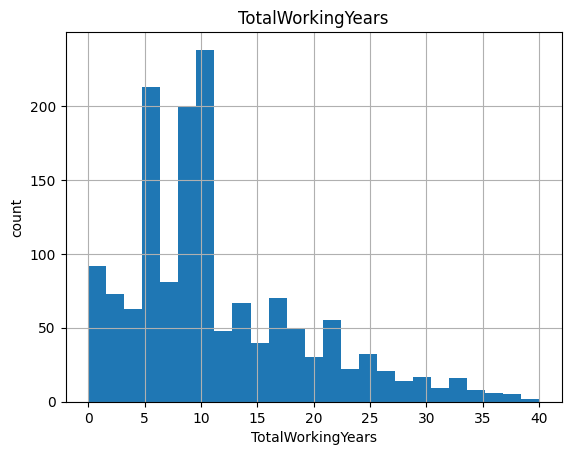

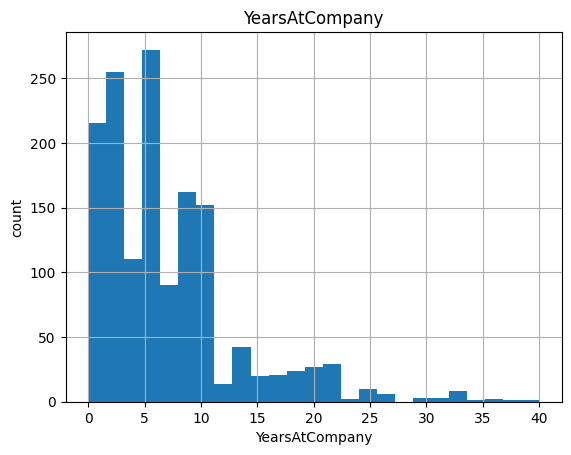

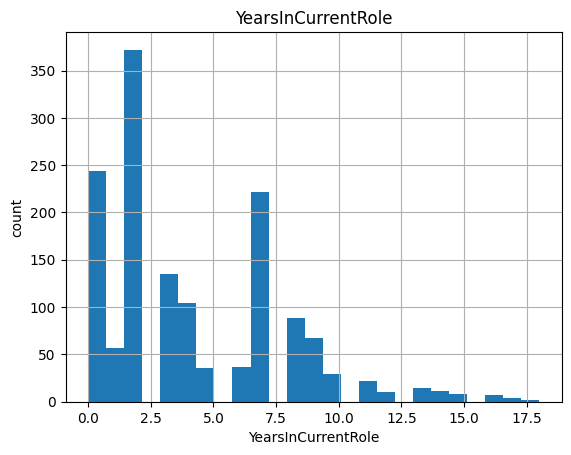

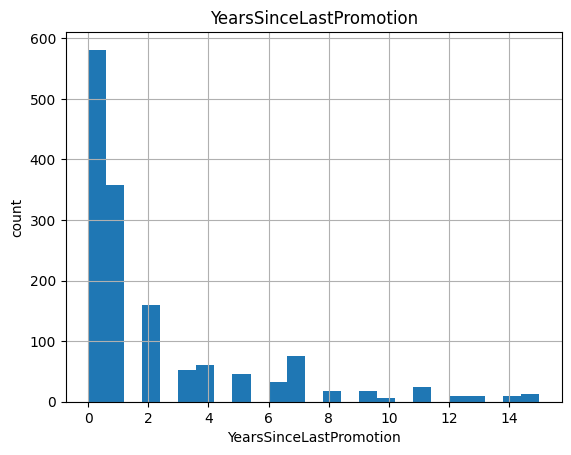

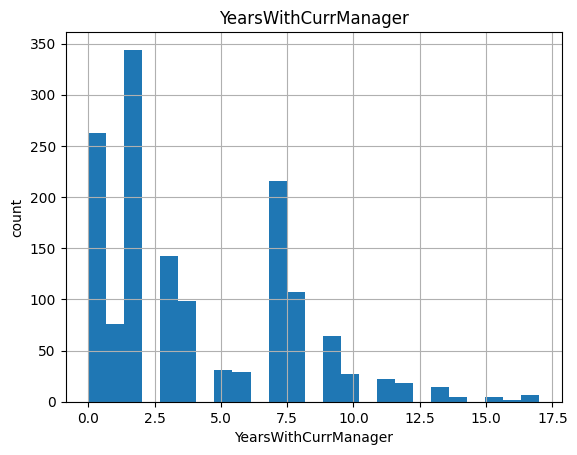

In [57]:
for feature in continuous_features:
    data = dataset.copy()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

Finding Outliers for numerical features

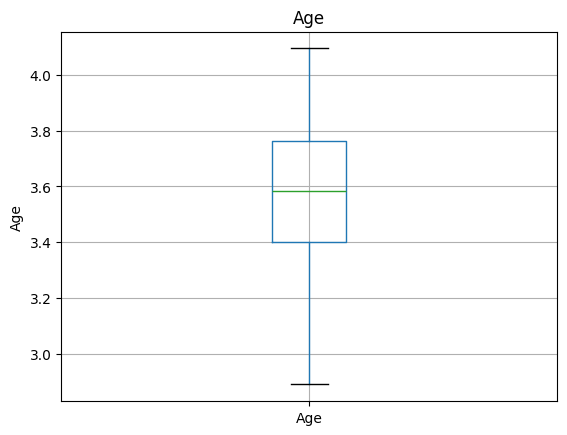

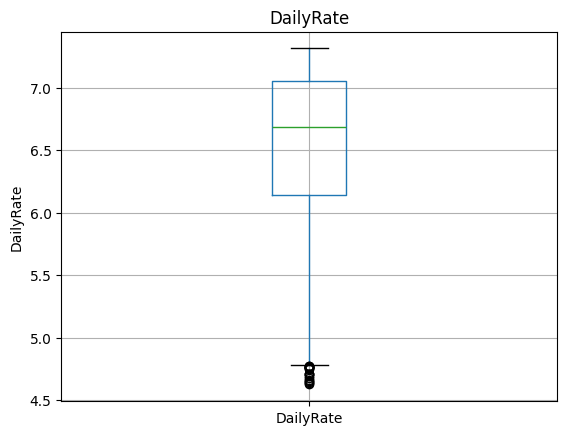

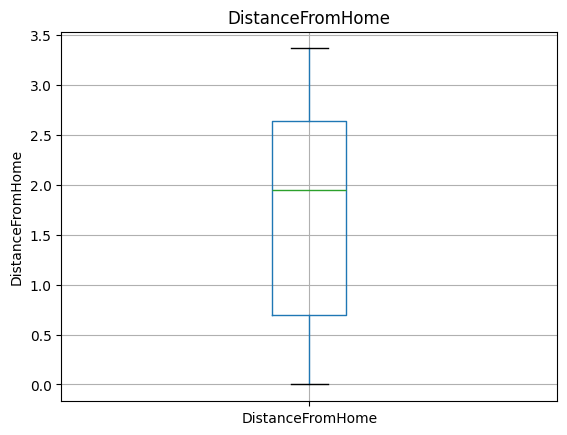

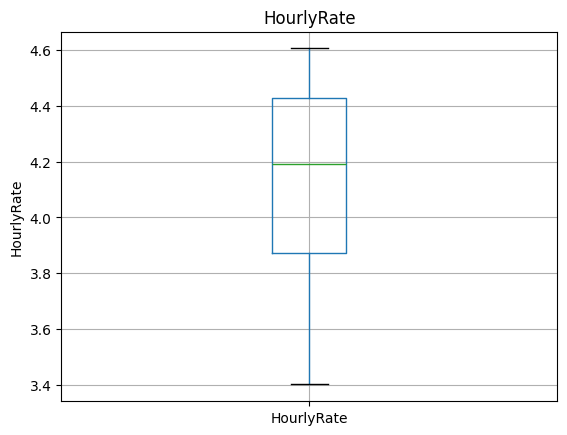

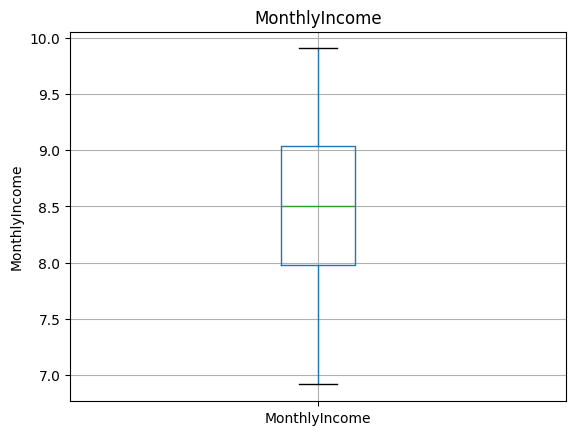

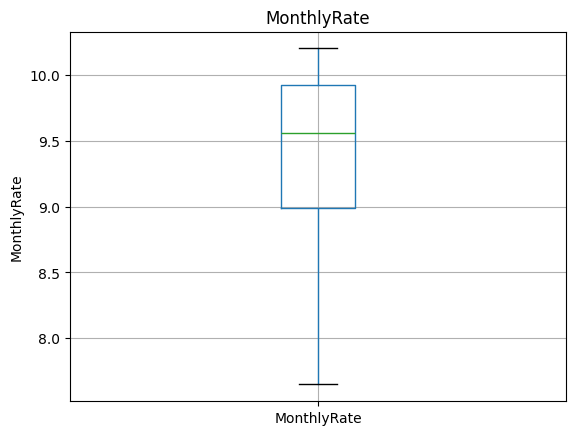

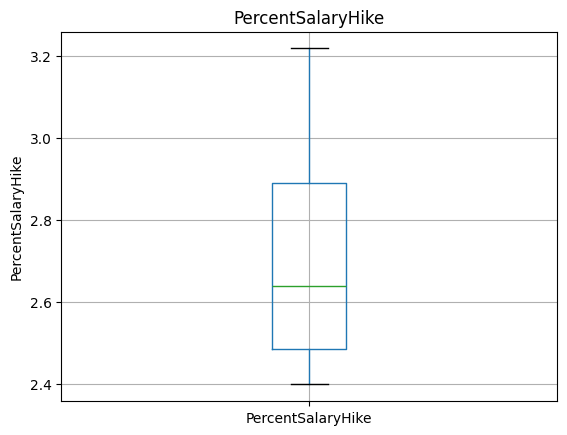

In [58]:
for feature in continuous_features:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Categorical Features

In [66]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']

categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [67]:
# Attrition is the dependent variable. So, it must be dropped from categorical features.

categorical_features.remove('Attrition')

In [68]:
print(categorical_features)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [69]:
# Number of categories each categorical feature has:

for feature in categorical_features:
    print("For feature {}, the cardinality is {}".format(feature, len(dataset[feature].unique())))

For feature BusinessTravel, the cardinality is 3
For feature Department, the cardinality is 3
For feature EducationField, the cardinality is 6
For feature Gender, the cardinality is 2
For feature JobRole, the cardinality is 9
For feature MaritalStatus, the cardinality is 3
For feature Over18, the cardinality is 1
For feature OverTime, the cardinality is 2


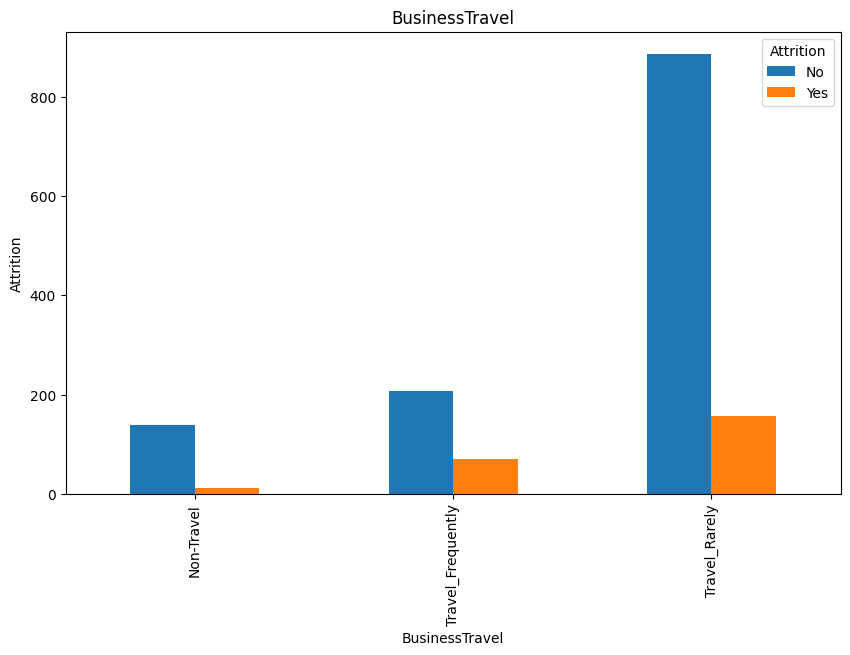

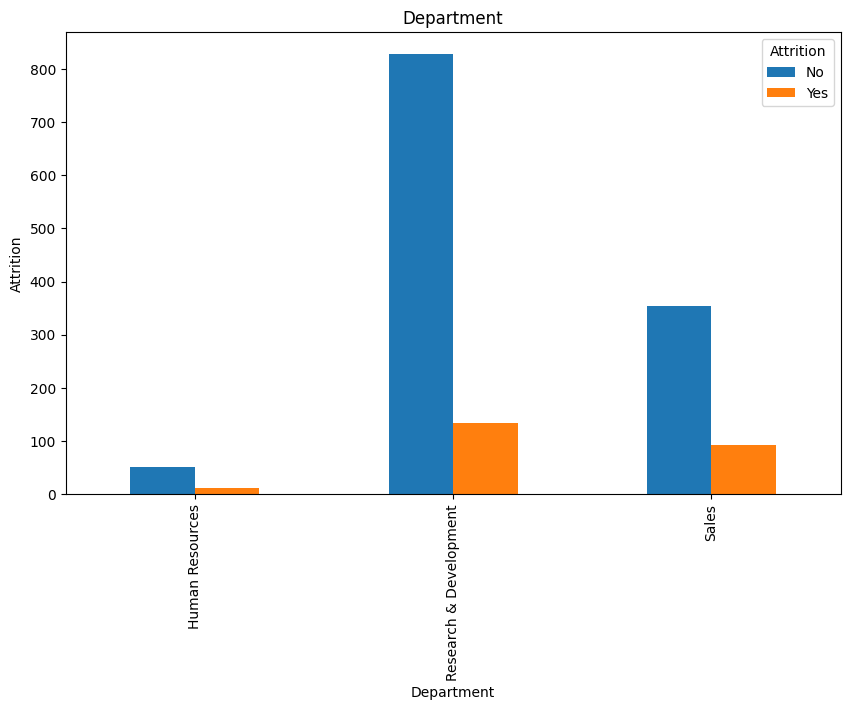

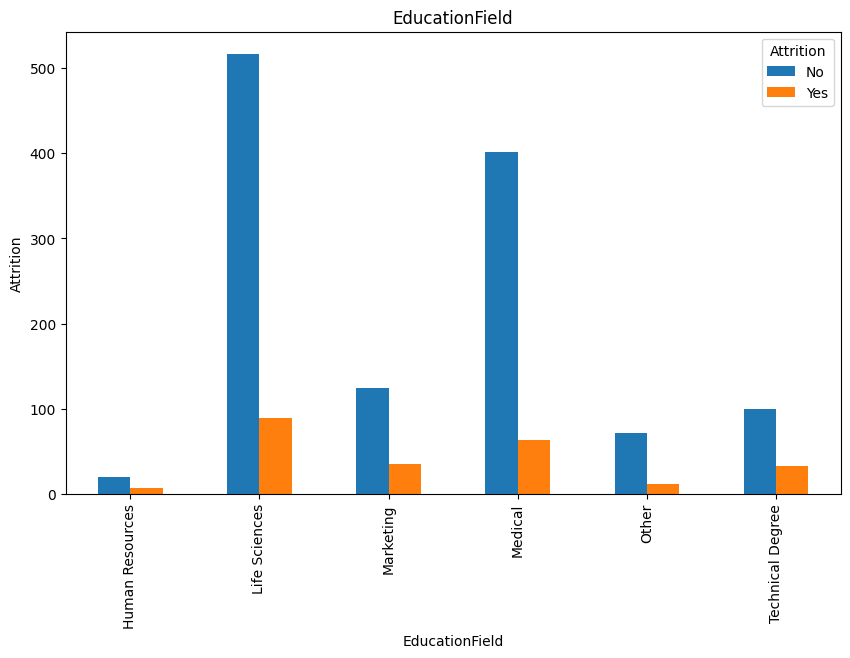

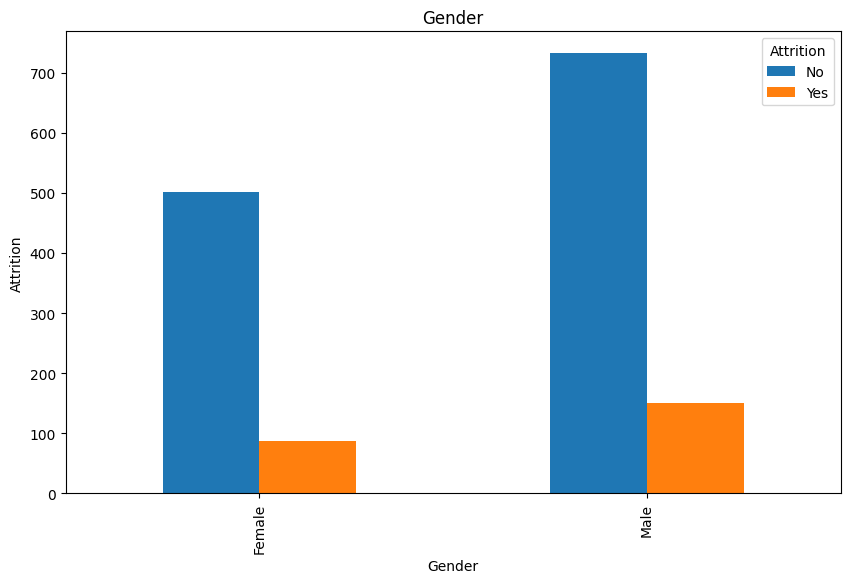

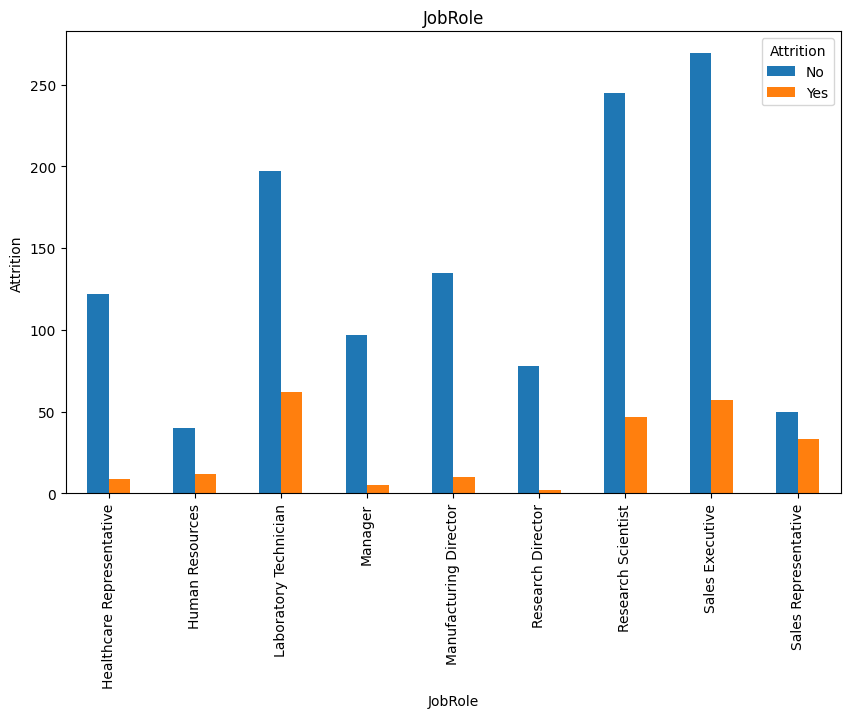

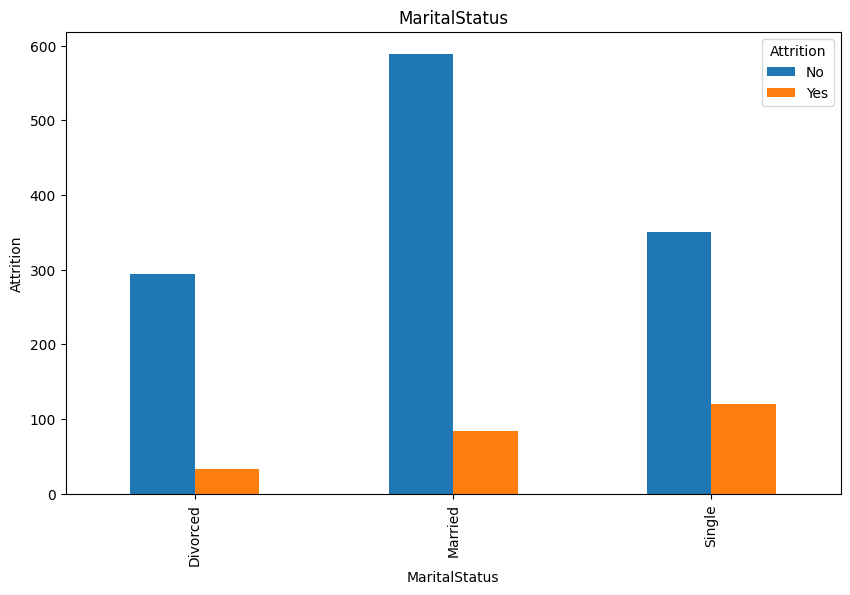

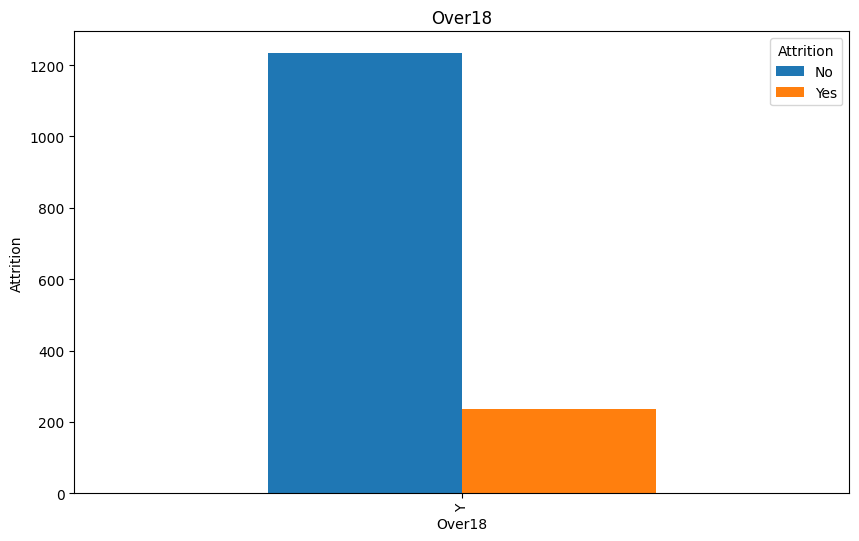

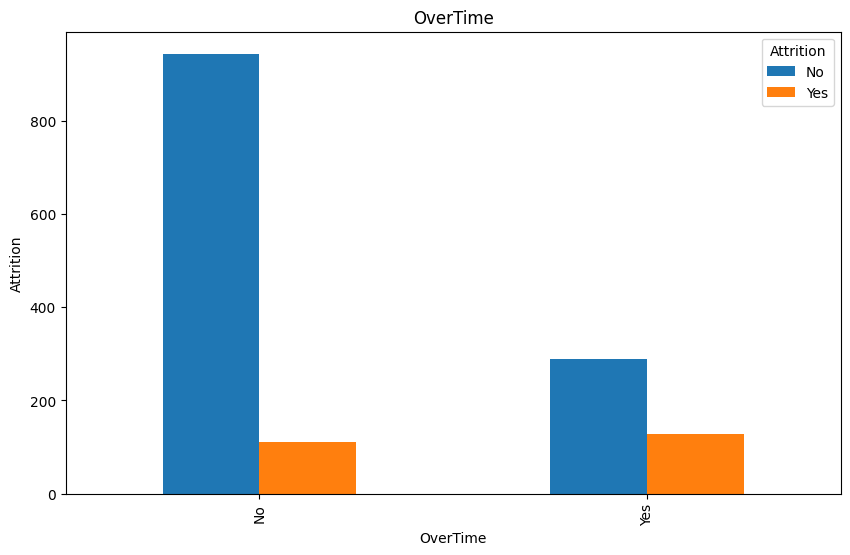

In [70]:
# Finding the relationship between each categorical feature with respect to Attrition.

for feature in categorical_features:
    
    data = dataset.copy()

    # Count occurrences of each combination of categorical feature and Attrition
    count_data = data.groupby([feature, 'Attrition']).size().reset_index(name='count')

    # Pivot the data so that 'Yes' and 'No' are separate columns
    pivot_data = count_data.pivot(index=feature, columns= 'Attrition', values='count').fillna(0)

    # Plot the grouped bar chart
    pivot_data.plot(kind='bar', stacked=False, figsize=(10, 6))

    plt.xlabel(feature)
    plt.ylabel('Attrition')
    plt.title(feature)
    # plt.xticks(rotation=0)
    # plt.legend(title='Y', loc='upper right')

    plt.show()

2. FEATURE ENGINEERING

As seen in the EDA part, the continuous numerical features were not normally distributed. So, applying log normal distribution for these features.

In [71]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [72]:
dataset.shape

(1470, 35)

In [73]:
# Performing log normal distribution

numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike']

for feature in numerical_features:
    dataset[feature] = np.log(dataset[feature])

In [74]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3.713572,Yes,Travel_Rarely,7.004882,Sales,0.000000,2,Life Sciences,1,1,2,Female,4.543295,3,2,Sales Executive,4,Single,8.698347,9.877092,8,Y,Yes,2.397895,3,1,80,0,8,0,1,6,4,0,5
1,3.891820,No,Travel_Frequently,5.631212,Research & Development,2.079442,1,Life Sciences,1,2,3,Male,4.110874,2,2,Research Scientist,2,Married,8.542861,10.122904,1,Y,No,3.135494,4,4,80,1,10,3,3,10,7,1,7
2,3.610918,Yes,Travel_Rarely,7.224753,Research & Development,0.693147,2,Other,1,4,4,Male,4.521789,2,1,Laboratory Technician,3,Single,7.644919,7.781556,6,Y,Yes,2.708050,3,2,80,0,7,3,3,0,0,0,0
3,3.496508,No,Travel_Frequently,7.238497,Research & Development,1.098612,4,Life Sciences,1,5,4,Female,4.025352,3,1,Research Scientist,3,Married,7.975565,10.050139,1,Y,Yes,2.397895,3,3,80,0,8,3,3,8,7,3,0
4,3.295837,No,Travel_Rarely,6.381816,Research & Development,0.693147,1,Medical,1,7,1,Male,3.688879,3,1,Laboratory Technician,2,Married,8.151333,9.719084,9,Y,No,2.484907,3,4,80,1,6,3,3,2,2,2,2


ENCODING

In our dataset: "BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18 and OverTime" are the categorical features. All these features are nominal categorical features. So, One-hot encoding is performed.

In [75]:
# Performing One-Hot Encoding 

dataset_encoded = pd.get_dummies(dataset, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'])

In [79]:
#print(dataset_encoded)

dataset_encoded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,3.713572,Yes,7.004882,0.000000,2,1,1,2,4.543295,3,2,4,8.698347,9.877092,8,2.397895,3,1,80,0,8,0,1,6,4,0,5,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True
1,3.891820,No,5.631212,2.079442,1,1,2,3,4.110874,2,2,2,8.542861,10.122904,1,3.135494,4,4,80,1,10,3,3,10,7,1,7,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,True,False
2,3.610918,Yes,7.224753,0.693147,2,1,4,4,4.521789,2,1,3,7.644919,7.781556,6,2.708050,3,2,80,0,7,3,3,0,0,0,0,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True
3,3.496508,No,7.238497,1.098612,4,1,5,4,4.025352,3,1,3,7.975565,10.050139,1,2.397895,3,3,80,0,8,3,3,8,7,3,0,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True
4,3.295837,No,6.381816,0.693147,1,1,7,1,3.688879,3,1,2,8.151333,9.719084,9,2.484907,3,4,80,1,6,3,3,2,2,2,2,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False


In [80]:
dataset_encoded = dataset_encoded.replace({True: 1, False: 0})
dataset_encoded.head()

C:\Users\Karthik Bhat\AppData\Local\Temp\ipykernel_7676\1877730085.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_encoded = dataset_encoded.replace({True: 1, False: 0})


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,3.713572,Yes,7.004882,0.000000,2,1,1,2,4.543295,3,2,4,8.698347,9.877092,8,2.397895,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,3.891820,No,5.631212,2.079442,1,1,2,3,4.110874,2,2,2,8.542861,10.122904,1,3.135494,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,3.610918,Yes,7.224753,0.693147,2,1,4,4,4.521789,2,1,3,7.644919,7.781556,6,2.708050,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,3.496508,No,7.238497,1.098612,4,1,5,4,4.025352,3,1,3,7.975565,10.050139,1,2.397895,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,3.295837,No,6.381816,0.693147,1,1,7,1,3.688879,3,1,2,8.151333,9.719084,9,2.484907,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


Feature Scaling

In [82]:
feature_scale = [feature for feature in dataset_encoded.columns if feature not in ['EmployeeNumber', 'Attrition']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataset_encoded[feature_scale])

MinMaxScaler()

In [83]:
scaler.transform(dataset_encoded[feature_scale])

array([[0.68373663, 0.88552102, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.83178668, 0.37440326, 0.6175405 , ..., 0.        , 1.        ,
        0.        ],
       [0.59847378, 0.96733118, 0.20584683, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.33677265, 0.15569851, 0.41169366, ..., 0.        , 0.        ,
        1.        ],
       [0.83178668, 0.85784288, 0.20584683, ..., 0.        , 1.        ,
        0.        ],
       [0.5282418 , 0.67628383, 0.6175405 , ..., 0.        , 1.        ,
        0.        ]])

In [84]:
preProcessed_data = pd.concat([dataset_encoded[['EmployeeNumber', 'Attrition']].reset_index(drop=True),
                               pd.DataFrame(scaler.transform(dataset_encoded[feature_scale]), columns = feature_scale)],
                               axis=1)

In [85]:
preProcessed_data.head()

,EmployeeNumber,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1,Yes,0.683737,0.885521,0.000000,0.25,0.0,0.333333,0.948607,0.666667,0.25,1.000000,0.596518,0.872312,0.888889,0.000000,0.0,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,No,0.831787,0.374403,0.617540,0.00,0.0,0.666667,0.589446,0.333333,0.25,0.333333,0.544458,0.968455,0.111111,0.898437,1.0,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,4,Yes,0.598474,0.967331,0.205847,0.25,0.0,1.000000,0.930745,0.333333,0.00,0.666667,0.243814,0.052694,0.666667,0.377786,0.0,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,5,No,0.503446,0.972445,0.326260,0.75,0.0,1.000000,0.518412,0.666667,0.00,0.666667,0.354519,0.939995,0.111111,0.000000,0.0,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,7,No,0.336773,0.653689,0.205847,0.00,0.0,0.000000,0.238944,0.666667,0.00,0.333333,0.413369,0.810511,1.000000,0.105985,0.0,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [86]:
preProcessed_data.to_csv('preProcessed_data.csv', index = False)